[<- Anterior](README.md) | [Próximo ->](linearregression_multiple.ipynb)

# Regressão Linear Simples

Um modelo de regressão linear simples é um modelo de regressão que utiliza uma regressão linear para realizar previsões a partir de uma unica feature. O uso desse modelo assume que a relação entre um target e uma feature pode ser aproximada de uma linha reta.

**O que será abordado**
- Imports
- Dados de teste
- Criação do Modelo
- Treinamento do Modelo
- Realizando Previsões com o modelo

> AVISO: Temas relacionados à divisão dos dados não serão aprofundados nesse documento, porém, explicações sobre esse processo podem ser encontradas na pasta [Validacao](../Validacao/README.md)

# Imports

In [22]:
# Import da biblioteca numpy -> Utilizada para criar conjuntos de dados de teste
import numpy as np

# Import da biblioteca matplotlib -> Utilizada para criar visualizações durante os testes
import matplotlib.pyplot as plt

# Import da função train_test_split
from sklearn.model_selection import train_test_split

# Import da Classe LinearRegression -> Utilizada para criar o modelo de regressão linear
from sklearn.linear_model import LinearRegression

# Dados de teste

Nessa seção será desenvolvido um código com numpy que visa criar um conjunto de dados que possa ser usado para o teste de um modelo de Regressão Linear simples.

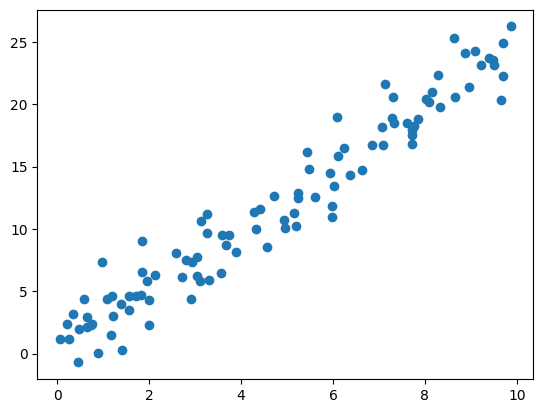

In [23]:
# Define uma seed para a criação de valores aleátorios -> Garante que os dados gerados serão os mesmos e todas as execuções, possibilitando analises reprodutiveis
np.random.seed(42)

# Criação do conjunto de Feature
x = np.random.rand(100, 1) * 10

# Criação do conjunto de Targets
y = 2.5 * x + np.random.randn(100, 1) * 2 

# Plot dos dados gerados -> Exibe um gráfico com cada par de entrada e saída
plt.scatter(x, y)
plt.show()

Explicação dos dados:
- **x** = A função `np.random.rand(100, 1)` cria uma matriz de 100 linhas e uma coluna com valores de 0 a 1. Multiplicar os valores por 10 implica que esses números são distribuídos de 0 a 10

- **y** = A expressão `2.5 * x` faz com que a relação entre x e y seja linear, ideal para o teste de um modelo de regressão linear. Já a expressão `+ np.random.randn(100, 1) * 2` faz com que um ruido seja adicionado aos dados, o que é comum em dados reais. 

Note que, no conjunto de dados criado, os pontos na cordenada (x, y) apresentam uma tendencia bastante perceptivel em que o valor de y aumenta de forma quase proporcional ao valor de x. Esse é um caso ideal para a aplicação de um modelo de regressão linear, pois o que o modelo vai aprender durante o treino é de que forma o valor de x (feature) impacta o valor de y (target). 

# Criação do Modelo

Para criar um modelo de Regressão Linear utilizando a biblioteca scikit-learn podemos utilizar a classe `LinearRegression()`. Isso é feito com a seguinte sintaxe:

````py
nome_do_modelo = LinearRegression()
````

Veja no exemplo abaixo:

In [24]:
# Criação do modelo
simple_lr = LinearRegression()

O código executado cria um modelo de regressão linear chamado simple_lr.

# Treinamento do modelo

O treinamento do modelo é realizado com o método `.fit()` do modelo criado.

Esse método necessita de dois parâmetros, sendo eles:

- **x** = Features de treino.
- **y** = Targets de treino

Ainda é importante ressaltar que, conforme foi abordado no documento [train_test.ipynb](../../Validacao/train_test_split.ipynb), pode ser necessário dividir o conjunto de dados utilizado em treino e teste, sendo que, **APENAS** os dados de treino são usados durante o processo de treinamento do modelo.

Veja no exemplo abaixo:

In [25]:
# Separação dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

# Treinamento do modelo
simple_lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Após a aplicação do método `.fit()` com os conjuntos de treino o modelo esta treinado, podendo assim ser utilizado para realizar previsões com base em novos conjuntos de dados.

# Realizando Previsões com o modelo

Uma vez que um modelo de Regressão Linear simples tenha sido treinado, é possível usa-lo para realizar previsões à partir de novos dados. 

Esse processo é realizado com o método `.predict()` do modelo, esse método precisa de um único parâmetro:

- **x** = Conjunto de dados com os quais se deseja realizar previsões. Esses dados devem ser fornecidos na forma de um Array , que deve conter arrays com as features necessárias para realizar as previsões. Pode também ser fornecido da forma de um Dataframe com os dados necessários.

O retorno dessa função é um Array, que contém um conjunto de Arrays com os targets previstos. Ou, no caso de um Dataframe ser utilizado como parâmetro de entrada, a saída é um único array com os dados previstos.

Veja um exemplo abaixo:

Dados de Entrada
[[0.6355835 ]
 [8.9482735 ]
 [7.72244769]
 [6.62522284]
 [2.58779982]
 [4.40152494]
 [2.92144649]
 [8.63103426]
 [0.20584494]
 [3.74540119]
 [4.31945019]
 [6.07544852]
 [8.15461428]
 [9.48885537]
 [1.19594246]
 [1.5601864 ]
 [7.71270347]
 [0.74044652]
 [8.32442641]
 [1.70524124]]
--------------------
Dados Previstos
[[ 1.82376677]
 [21.93822768]
 [18.97206085]
 [16.31707355]
 [ 6.5476021 ]
 [10.93632621]
 [ 7.35493677]
 [21.17059453]
 [ 0.78391571]
 [ 9.34868425]
 [10.73772752]
 [14.98676842]
 [20.01778708]
 [23.24628955]
 [ 3.17968384]
 [ 4.06105565]
 [18.94848246]
 [ 2.07750689]
 [20.42868648]
 [ 4.4120491 ]]


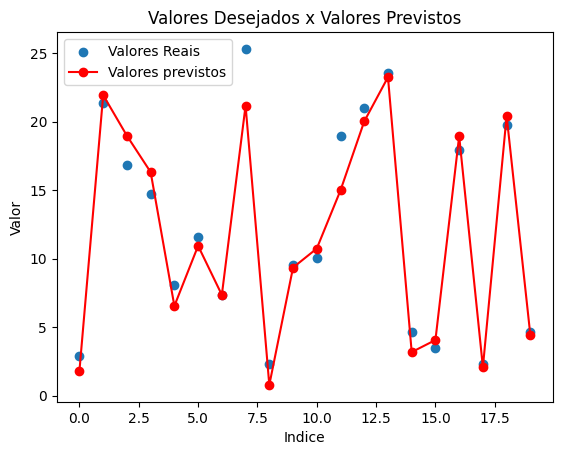

In [35]:

# Exibição dos vaores de entrada
print('Dados de Entrada')
print(x_test)

print('-'*20) # Adiciona um separador entre as entradas e saídas -> Utilizada nessa parte para melhorar a representação visual

# Previsão dos dados de teste
pred = simple_lr.predict(x_test)

# Previsão dos dados de Teste
print('Dados Previstos')
print(pred)

# Visualização dos dados previstos e saídas esperadas

# Criação de um array para unir os dados previstos e dados esperados
data = [range(len(pred)), y_test, pred]
data
# Criação da visualização dos dados previstos
plt.scatter(data[0], data[1], label = 'Valores Reais')
plt.plot(data[0], data[2], marker = 'o', color = 'red', label = 'Valores previstos')
plt.title('Valores Desejados x Valores Previstos')
plt.xlabel('Indice')
plt.ylabel('Valor')
plt.legend()
plt.show()

Dessa forma, percebe-se que para realizar uma previsão é necessário que os dados estejam ordenados na forma de um Array com a seguinte estrutura.

features = [[x1], [x2], ..., [xn]] ou um dataframe cujas colunas sejam as necessárias para as previsões.


Da mesma forma, após aplicar o método `.predict()` o resultado é um Array de mesma estrutura, porém, contendo os valores previstos (isso é, o valor de y para a respectiva entrada x, no array fornecido). Sendo assim:

`*nome_do_modelo*.predict(features)`, retorna: [[y1], [y2], ..., [yn]]   

onde:   

y1 é a previsão feita com a entrada x1 - y2 é a previsão feita com a entrada x2 - etc...

#
[<- Anterior](README.md) | [Próximo ->](linearregression_multiple.ipynb)